## Context:
-----------------------------
In this case study, we will use the Air pollution dataset which contains information about 13 months of data on major pollutants and meteorological levels of a city. 

## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

#### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

#### Load data

In [5]:
data = pd.read_csv("Air_Pollution.csv")

In [6]:
data.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


In [7]:
# Check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

**Observation:**
- There are 403 rows and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- Weather is of object data type. We can convert it to numeric data type (by assigning numeric values for each category)
- Most of the columns have missing values

In [9]:
# Check missing value count in each column
data.isna().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

## Data Pre-processing and Exploratory Data Analysis

### Drop columns with unique values

In [12]:
# Check if all serial numbers are unique
data.SrNo.nunique()

403

In [13]:
# Check if all date values are unique
data.Date.nunique()

403

In [14]:
# - Since the Date and SrNo for all observations are unique, we can drop these columns as they would not add value to our analysis.
data.drop(columns = ['SrNo', 'Date'], inplace = True)

### Summary Statistics

In [16]:
data.describe()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
count,401.000000,402.000000,401.000000,397.000000,399.000000,401.000000,402.000000,402.000000,372.000000,401.000000,...,401.000000,402.000000,401.000000,401.000000,401.000000,393.000000,392.000000,391.000000,390.000000,392.000000
mean,81.323292,2.210000,74.433791,56.298917,25.988496,130.160673,6.525945,17.192488,8.128844,194.681222,...,24.425686,1.238035,0.188853,112.954813,732.560698,130.505445,265.622551,74.319003,25.964949,2.200765
std,97.204368,1.601589,25.862319,29.690436,25.273204,84.196954,3.983177,10.410131,6.733961,141.121196,...,7.419778,0.556081,0.785720,37.465048,1.799439,84.786348,135.526761,25.996784,25.417022,1.602474
min,1.120000,0.220000,25.270000,4.980000,0.000000,18.750000,0.160000,0.000000,0.300000,26.490000,...,6.560000,0.300000,-2.870000,3.310000,721.670000,18.750000,36.630000,25.270000,0.000000,0.370000
25%,11.380000,1.202500,54.500000,30.120000,9.515000,68.110000,3.235000,9.695000,3.382500,87.670000,...,18.820000,0.852500,-0.170000,84.900000,731.690000,68.050000,163.380000,54.030000,9.412500,1.207500
50%,39.220000,1.780000,73.680000,53.210000,21.680000,108.240000,5.910000,16.240000,6.060000,152.310000,...,26.570000,1.160000,-0.050000,121.850000,733.380000,108.240000,250.105000,73.520000,21.605000,1.775000
75%,118.030000,2.737500,91.430000,76.850000,37.145000,166.160000,8.940000,22.972500,10.570000,264.380000,...,29.860000,1.520000,0.400000,141.030000,733.760000,170.990000,357.955000,91.370000,37.197500,2.667500
max,480.900000,19.900000,149.010000,159.700000,371.750000,550.230000,17.510000,48.410000,32.350000,743.700000,...,41.050000,3.450000,3.560000,345.680000,736.080000,550.230000,705.700000,149.010000,371.750000,19.900000


NO
Skew: 1.65


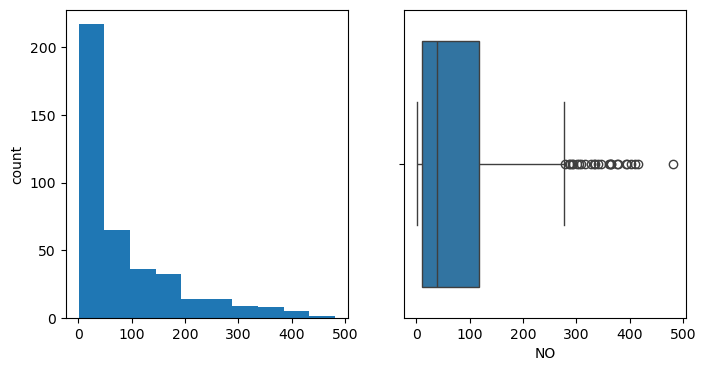

CO
Skew: 4.16


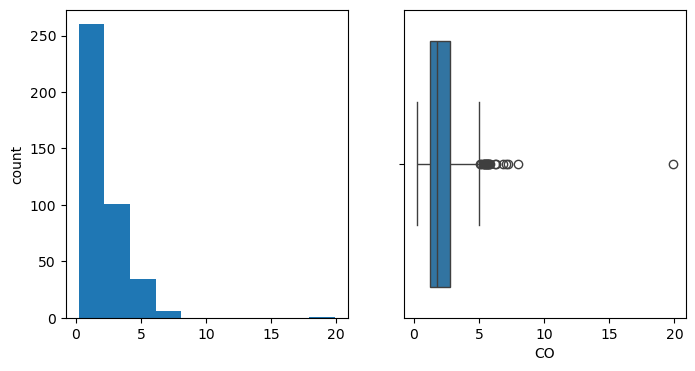

NO2
Skew: 0.35


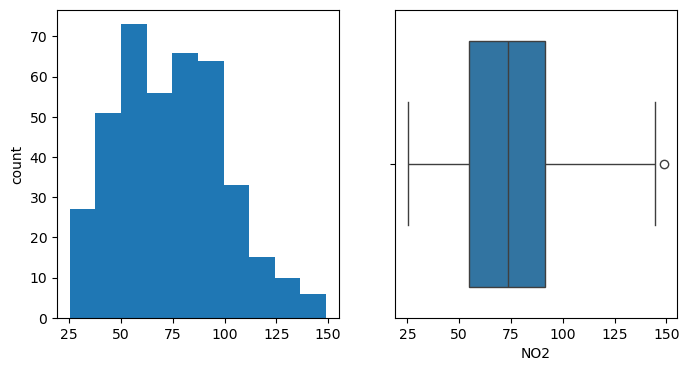

O3
Skew: 0.53


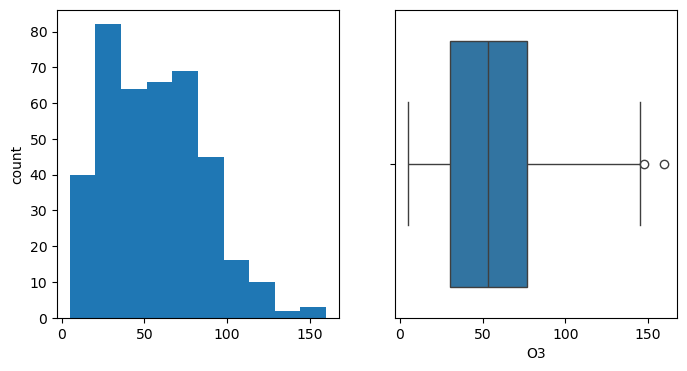

SO2
Skew: 6.87


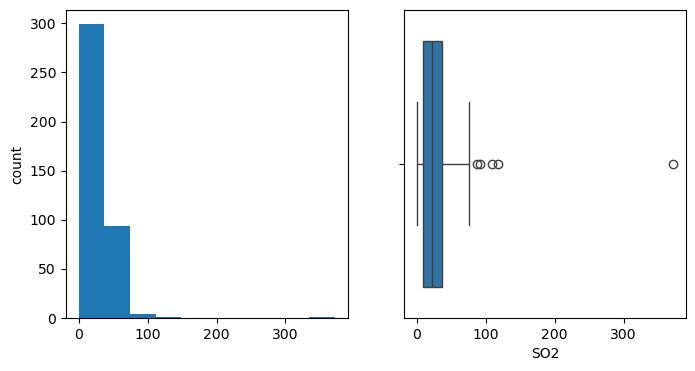

PM2.5
Skew: 1.45


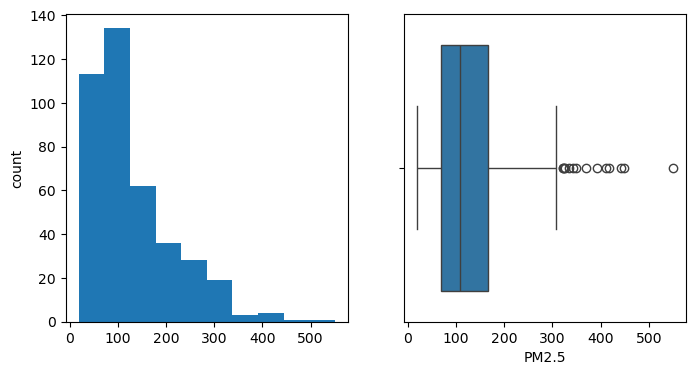

Benzene
Skew: 0.71


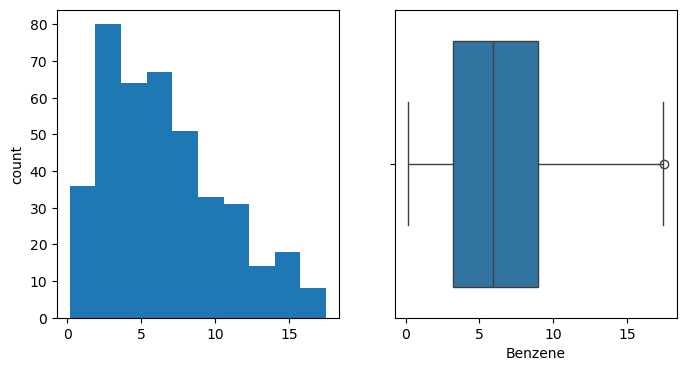

Toulene
Skew: 0.61


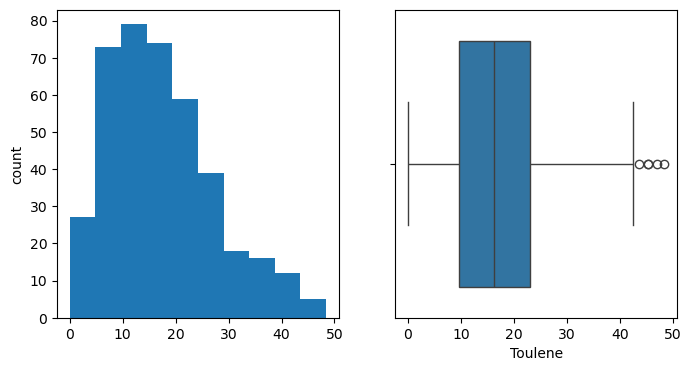

P_Xylene
Skew: 1.55


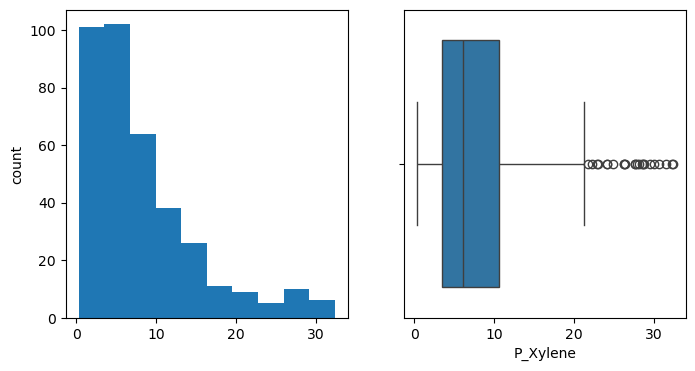

NOx
Skew: 1.32


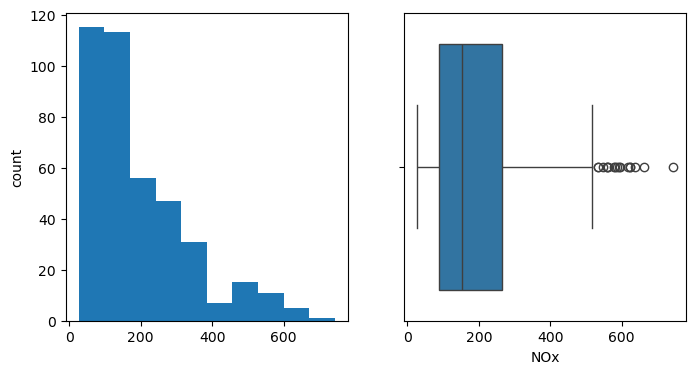

PM10
Skew: 0.61


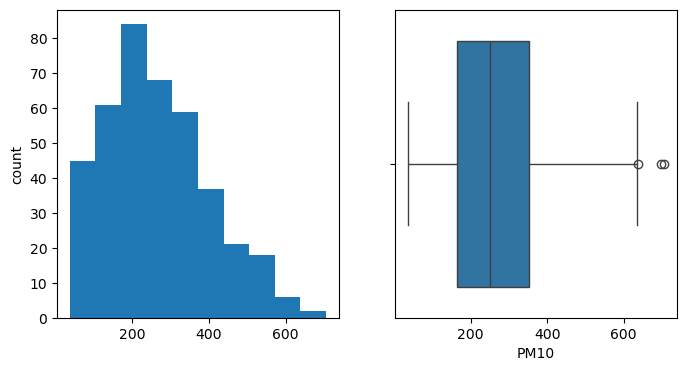

WindDirection
Skew: -0.49


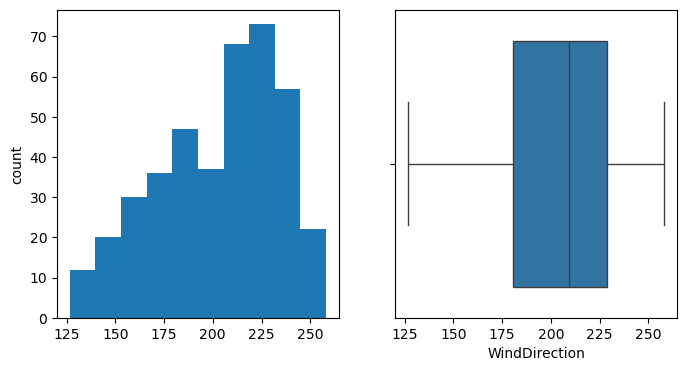

NH3
Skew: 1.34


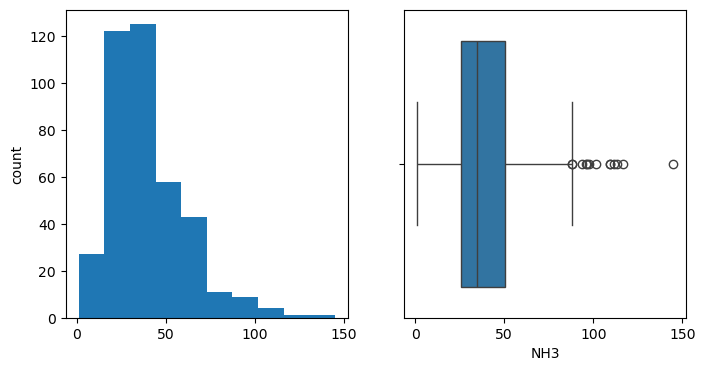

RH
Skew: -0.36


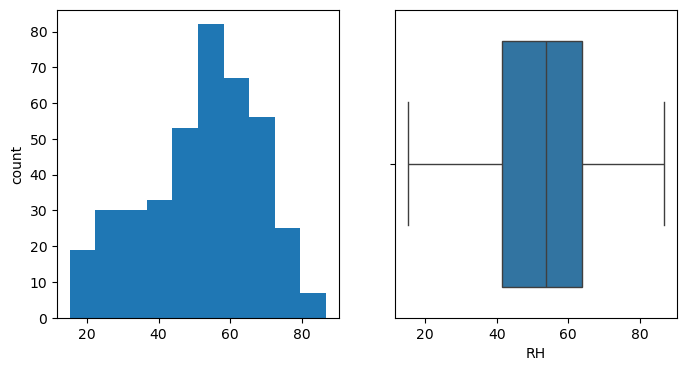

Temp
Skew: -0.57


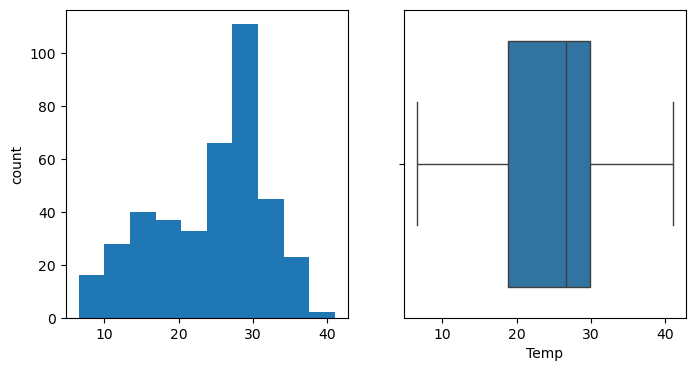

WindSpeed
Skew: 0.9


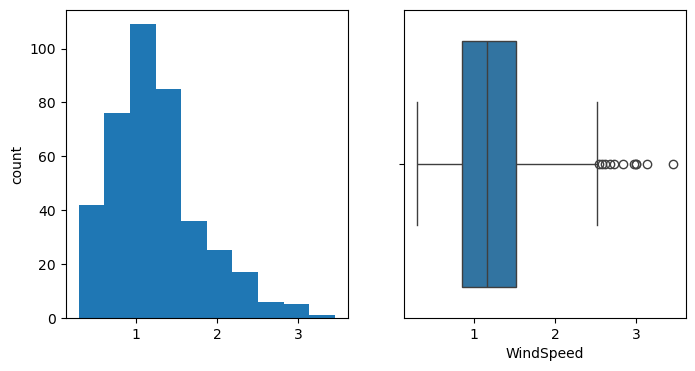

VerticalWindSpeed
Skew: 0.86


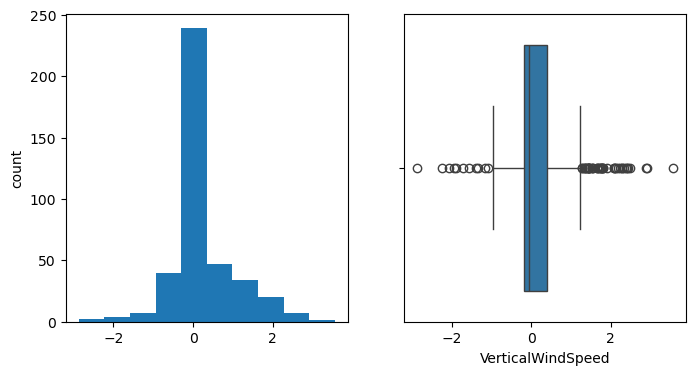

Solar
Skew: 0.15


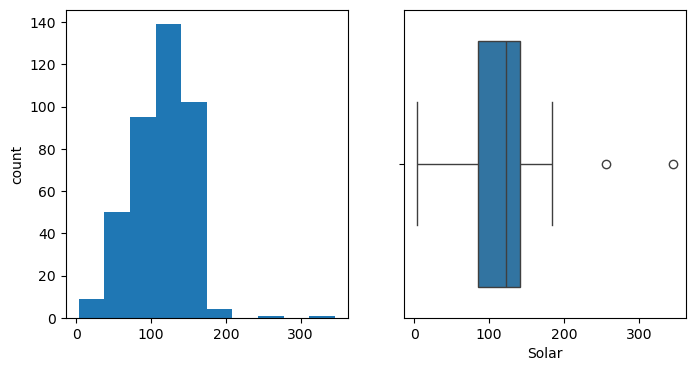

BarPressure
Skew: -1.96


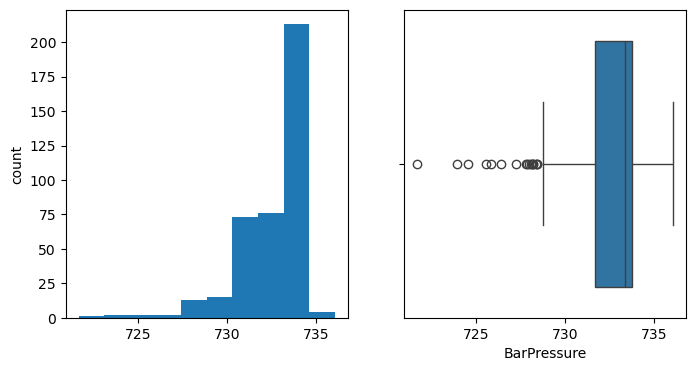

PD_PM2.5
Skew: 1.44


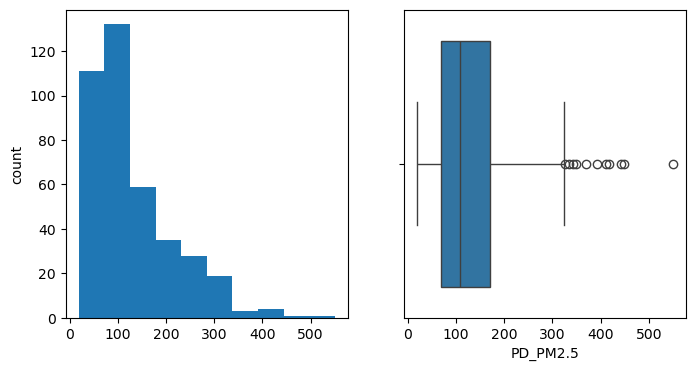

PD_PM10
Skew: 0.6


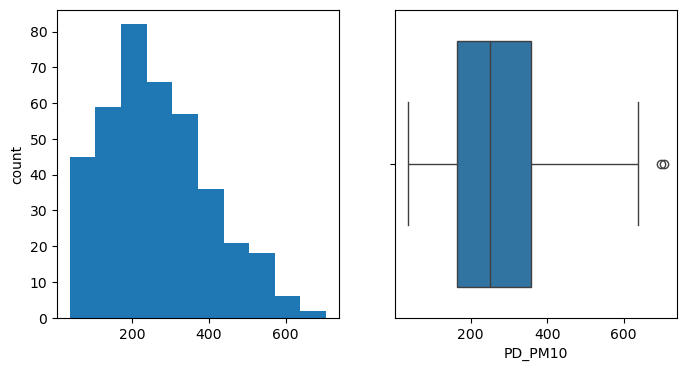

PD_NO2
Skew: 0.36


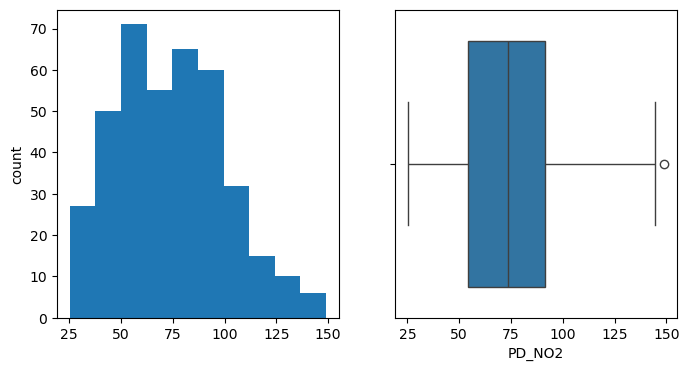

PD_SO2
Skew: 6.9


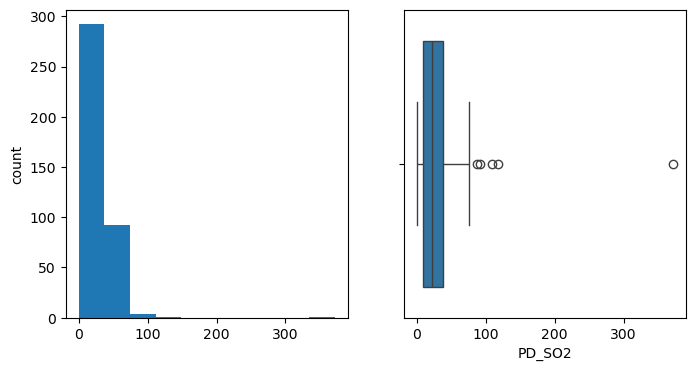

PD_CO
Skew: 4.26


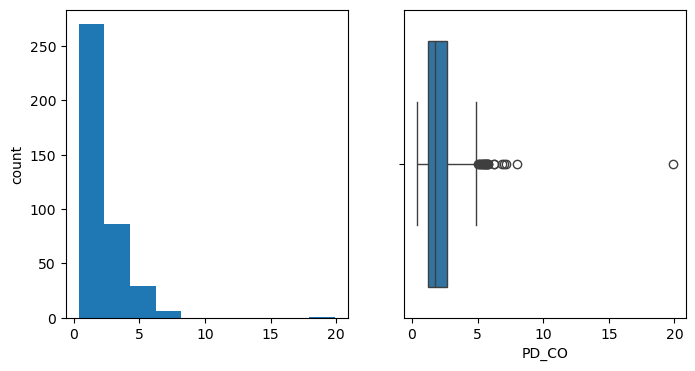

In [17]:
# Check distribution and outliers for each column in the data
data_cols = list(data.columns)
for col in data_cols:
    if col != 'Weather':
        print(col)
        print('Skew:', round(data[col].skew(), 2))
        plt.figure(figsize = (8,4))
        plt.subplot(1,2,1)
        data[col].hist(bins = 10, grid = False)
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=data[col])
        plt.show()

### Impute missing values

In [19]:
#Impute missing values with mode for the Weather column and with median for all other columns due to presence of outliers
for col in data.columns:
    if col == 'Weather':
        data[col].fillna(data[col].mode()[0], inplace = True)
    else:
        data[col].fillna(np.round(data[col].median(),2), inplace = True)

In [20]:
data.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,1.22,0.08,162.18,732.25,Summer,108.24,250.10,73.52,21.60,1.78
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,1.55,-0.17,146.94,728.08,Summer,108.24,250.10,73.52,21.60,1.78
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


In [21]:
data.isnull().sum()

NO                   0
CO                   0
NO2                  0
O3                   0
SO2                  0
PM2.5                0
Benzene              0
Toulene              0
P_Xylene             0
NOx                  0
PM10                 0
WindDirection        0
NH3                  0
RH                   0
Temp                 0
WindSpeed            0
VerticalWindSpeed    0
Solar                0
BarPressure          0
Weather              0
PD_PM2.5             0
PD_PM10              0
PD_NO2               0
PD_SO2               0
PD_CO                0
dtype: int64

In [22]:
#Creating dummy variables for Weather column
data = pd.get_dummies(data, drop_first=True)

In [23]:
data.sample(2)

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
197,176.15,3.32,107.66,76.85,25.31,158.45,11.68,28.12,6.06,336.48,...,733.50,155.18,250.10,107.26,25.19,3.42,False,False,False,False
218,49.94,2.43,94.84,51.95,29.13,237.48,10.00,21.78,11.59,152.71,...,733.75,326.87,463.73,104.85,30.89,2.76,False,False,False,False


### Scale the data

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
type(data_scaled)

numpy.ndarray

In [26]:
# Convert the numpy array to a dataframe for further analysis
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [27]:
data_scaled_df.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113085,-0.030312,-0.169077,-0.259051,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365728,-1.030531,-0.358001,-0.265380,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113085,-0.030312,-0.169077,-0.259051,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702820,-0.564440,-0.508901,-1.069216,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247000,-0.419764,-0.385620,-0.898322,-0.426401,-0.410019,1.37061,-0.39755


### Perform PCA

In [29]:
# Define the number of principal components (equal to number of columns)
m = data_scaled.shape[1]
# Find the principal components for the data
pca1 = PCA(n_components = m, random_state = 1)
daat_pca1 = pd.DataFrame(pca1.fit_transform(data_scaled))

In [30]:
# Check the eigen values corresopnding to each principal component
exp_var = pca1.explained_variance_
exp_var

array([11.2721997 ,  3.58290906,  2.15398579,  1.89454257,  1.23300489,
        0.99922066,  0.87444239,  0.78059109,  0.66411082,  0.60579616,
        0.51703017,  0.45544705,  0.42085037,  0.38261047,  0.35966492,
        0.33234539,  0.28390975,  0.26976002,  0.24672489,  0.16389481,
        0.14335842,  0.12075247,  0.08619394,  0.07255162,  0.06935638,
        0.04705209,  0.02315691,  0.01418893])

In [31]:
# Check the percentage of variance explained by each principal component
exp_var_ratio = pca1.explained_variance_ratio_
exp_var_ratio

array([0.40157961, 0.12764352, 0.07673718, 0.06749434, 0.04392662,
       0.0355979 , 0.03115259, 0.02780908, 0.02365939, 0.02158189,
       0.01841954, 0.0162256 , 0.01499307, 0.01363075, 0.0128133 ,
       0.01184003, 0.01011447, 0.00961038, 0.00878974, 0.00583886,
       0.00510724, 0.00430189, 0.00307072, 0.0025847 , 0.00247087,
       0.00167626, 0.00082498, 0.00050549])

Text(0, 0.5, 'Cumulative Explained Variance')

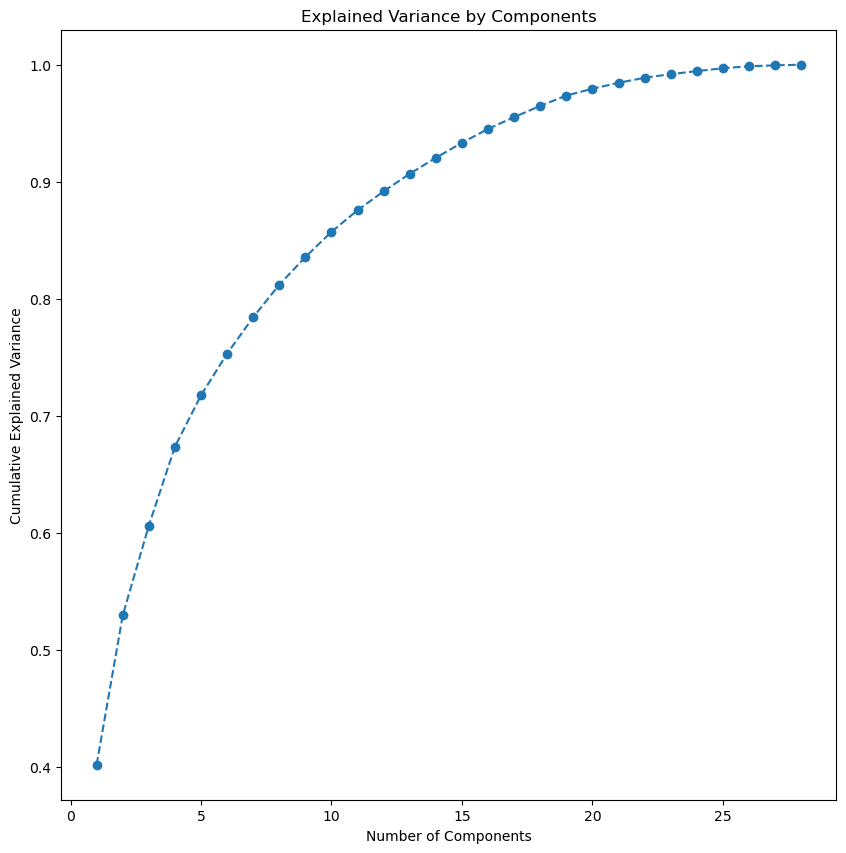

In [32]:
# Visualize the explained individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,29), exp_var_ratio.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

## How many Principal components explains more than 80% variance

In [34]:
# find the least number of components that can explain more than 80% variance
sum = 0
for ix, i in enumerate(exp_var_ratio):
  sum = sum + i
  if(sum>0.8):
    print("Number of PCs that explain at least 80% variance: ", ix+1)
    break

Number of PCs that explain at least 80% variance:  8


In [35]:
# Make a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:8],2), index=data_scaled_df.columns, columns=cols)

### Interpret coefficients of principal components

In [37]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NO,0.250000,-0.050000,-0.180000,0.140000,0.130000,-0.150000,-0.040000,-0.020000
CO,0.210000,0.040000,-0.180000,-0.000000,0.030000,-0.300000,0.050000,-0.030000
NO2,0.190000,-0.220000,-0.180000,0.060000,-0.240000,0.230000,0.110000,-0.100000
O3,0.020000,-0.380000,0.020000,0.180000,-0.080000,0.230000,0.350000,0.080000
SO2,0.120000,-0.190000,0.200000,0.280000,0.110000,-0.190000,0.000000,-0.380000
PM2.5,0.260000,-0.060000,0.100000,-0.180000,0.140000,0.050000,0.010000,-0.100000
Benzene,0.270000,0.090000,-0.150000,0.010000,0.010000,0.070000,0.080000,-0.000000
Toulene,0.250000,0.100000,-0.270000,0.080000,-0.010000,0.040000,0.110000,0.020000
P_Xylene,0.250000,0.070000,-0.220000,0.030000,0.100000,-0.160000,0.000000,-0.090000
NOx,0.240000,0.010000,-0.260000,0.150000,0.120000,-0.140000,0.010000,-0.030000


*Observation:*
- The first principal component, PC1 has high relation with hydrocarbons like Benzene, Toluene and Xylene. As these compound can be generated by fuel combustion, so they affects the air pollution.
- The fifth principal component, PC5, is explaining the direction of the wind which impacts air pollution irrespective of the concentration of most of the pollutants in the data.